# FINAL PROJECT CODE

## Imports

In [28]:
import pandas as pd
import numpy as np
import pickle
import re
import itertools
import scipy
import matplotlib.pyplot as plt

from sklearn.feature_selection import SelectKBest, chi2
from sklearn.feature_selection import SelectPercentile, SelectKBest, SelectFpr, chi2, mutual_info_classif
from sklearn.model_selection import train_test_split



## Read Data

In [16]:
df_train = pd.read_csv('dataset/training_set_rel3.tsv', sep='\t', encoding='ISO-8859-1')
df_test = pd.read_csv('dataset/test_set.tsv', sep='\t', encoding='ISO-8859-1')


In [18]:
df_train["weight"] = [0.5 if x == 2 else 1 for x in df_train['essay_set']]
df_test["weight"] = [0.5 if x == 2 else 1 for x in df_test['essay_set']]
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12976 entries, 0 to 12975
Data columns (total 29 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   essay_id        12976 non-null  int64  
 1   essay_set       12976 non-null  int64  
 2   essay           12976 non-null  object 
 3   rater1_domain1  12976 non-null  int64  
 4   rater2_domain1  12976 non-null  int64  
 5   rater3_domain1  128 non-null    float64
 6   domain1_score   12976 non-null  int64  
 7   rater1_domain2  1800 non-null   float64
 8   rater2_domain2  1800 non-null   float64
 9   domain2_score   1800 non-null   float64
 10  rater1_trait1   2292 non-null   float64
 11  rater1_trait2   2292 non-null   float64
 12  rater1_trait3   2292 non-null   float64
 13  rater1_trait4   2292 non-null   float64
 14  rater1_trait5   723 non-null    float64
 15  rater1_trait6   723 non-null    float64
 16  rater2_trait1   2292 non-null   float64
 17  rater2_trait2   2292 non-null  

In [20]:
df_train.describe()

,essay_id,essay_set,rater1_domain1,rater2_domain1,rater3_domain1,domain1_score,rater1_domain2,rater2_domain2,domain2_score,rater1_trait1,...,rater2_trait4,rater2_trait5,rater2_trait6,rater3_trait1,rater3_trait2,rater3_trait3,rater3_trait4,rater3_trait5,rater3_trait6,weight
count,12976.000000,12976.000000,12976.000000,12976.000000,128.000000,12976.000000,1800.000000,1800.000000,1800.000000,2292.000000,...,2292.000000,723.000000,723.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,12976.000000
mean,10295.395808,4.179485,4.127158,4.137408,37.828125,6.800247,3.333889,3.330556,3.333889,2.444154,...,2.710297,3.777317,3.589212,3.945312,3.890625,4.078125,3.992188,3.843750,3.617188,0.930641
std,6309.074105,2.136913,4.212544,4.264330,5.240829,8.970705,0.729103,0.726807,0.729103,1.211730,...,1.045795,0.689401,0.693256,0.643668,0.630390,0.622535,0.509687,0.538845,0.603417,0.172832
min,1.000000,1.000000,0.000000,0.000000,20.000000,0.000000,1.000000,1.000000,1.000000,0.000000,...,0.000000,1.000000,1.000000,2.000000,2.000000,2.000000,3.000000,2.000000,2.000000,0.500000
25%,4438.750000,2.000000,2.000000,2.000000,36.000000,2.000000,3.000000,3.000000,3.000000,2.000000,...,2.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,1.000000
50%,10044.500000,4.000000,3.000000,3.000000,40.000000,3.000000,3.000000,3.000000,3.000000,2.000000,...,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,1.000000
75%,15681.250000,6.000000,4.000000,4.000000,40.000000,8.000000,4.000000,4.000000,4.000000,3.000000,...,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,1.000000
max,21633.000000,8.000000,30.000000,30.000000,50.000000,60.000000,4.000000,4.000000,4.000000,6.000000,...,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,5.000000,5.000000,1.000000


## Insights of the data

Knowledge right now:
- essay two has two domain scoring
- Each essay set may have different scoring criteria (out of 5 or 10 or 50) ## this is a problem##
- rater traits on essay set 7-8 (may need to check relevanncy)
- Domain score is sum total of raters scores


Text(0, 0.5, 'max score')

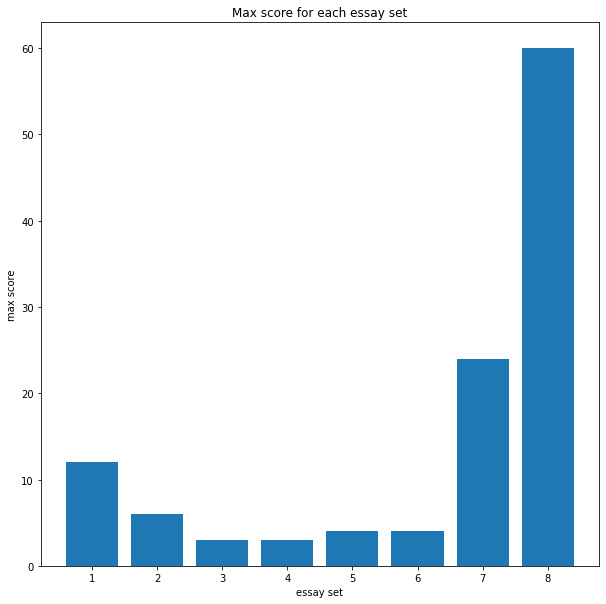

In [45]:
fig,ax = plt.subplots(figsize = (10,10))
maxScore = df_train.groupby(["essay_set"], as_index = False).agg("max")[["essay_set", "domain1_score"]]
ax.bar(maxScore["essay_set"], maxScore["domain1_score"])
ax.set_title("Max score for each essay set")
ax.set_xlabel("essay set")
ax.set_ylabel("max score")

Needs to normalize the data. Considers dividing the scores by the max value, or use logit link to make it under 0 to 1 for every data respective to each maximum.

In [59]:
def essaySetDistribution(df, essay_set):
    temp =  df.loc[ df["essay_set"] == essay_set].groupby(["domain1_score"], as_index = False).agg("count")
    plt.bar(temp["domain1_score"], temp["essay_id"])
    plt.show()

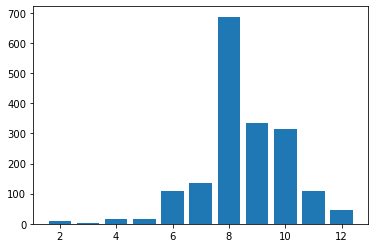

In [60]:
essaySetDistribution(df_train, 1)

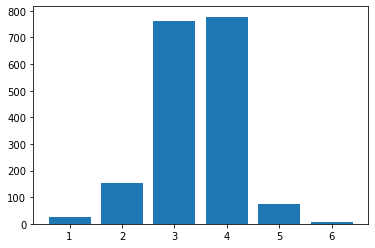